# Experiment 3: Neural Network Implementation from Scratch

## Objective
Implement a neural network using NumPy to classify:
1. **Linearly separable dataset** (using single-layer perceptron)
2. **Non-linearly separable dataset** (using multi-layer neural network)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!




#Linearly Separable Dataset

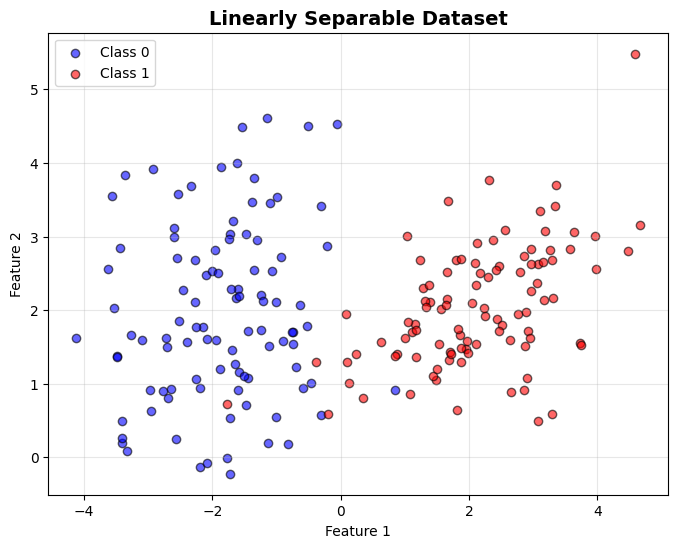

Dataset shape: (200, 2)
Class distribution: [100 100]


In [2]:
# Generate linearly separable dataset
X_linear, y_linear = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[y_linear == 0][:, 0], X_linear[y_linear == 0][:, 1],
            c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X_linear[y_linear == 1][:, 0], X_linear[y_linear == 1][:, 1],
            c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.title('Linearly Separable Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X_linear.shape}")
print(f"Class distribution: {np.bincount(y_linear)}")

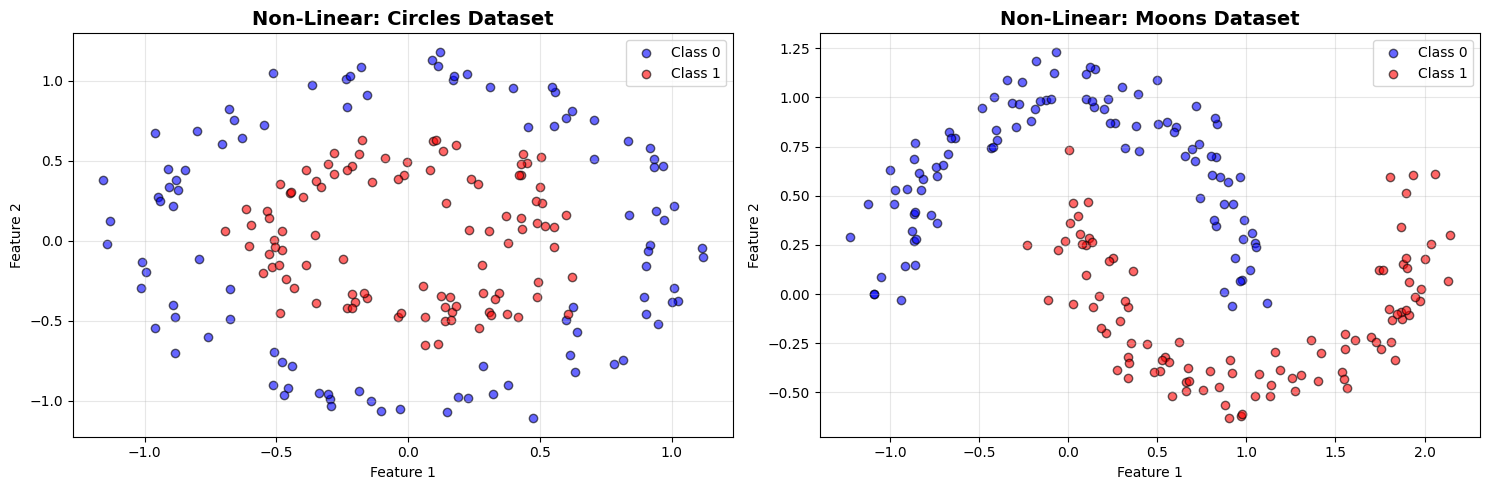

Circles dataset shape: (200, 2)
Moons dataset shape: (200, 2)


In [3]:
# Generate two types of non-linearly separable datasets
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# 1. Moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# Visualize both datasets
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Circles
axes[0].scatter(X_circles[y_circles == 0][:, 0], X_circles[y_circles == 0][:, 1],
                c='blue', label='Class 0', alpha=0.6, edgecolors='k')
axes[0].scatter(X_circles[y_circles == 1][:, 0], X_circles[y_circles == 1][:, 1],
                c='red', label='Class 1', alpha=0.6, edgecolors='k')
axes[0].set_title('Non-Linear: Circles Dataset', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Moons
axes[1].scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1],
                c='blue', label='Class 0', alpha=0.6, edgecolors='k')
axes[1].scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1],
                c='red', label='Class 1', alpha=0.6, edgecolors='k')
axes[1].set_title('Non-Linear: Moons Dataset', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Circles dataset shape: {X_circles.shape}")
print(f"Moons dataset shape: {X_moons.shape}")

# Define Activation Functions

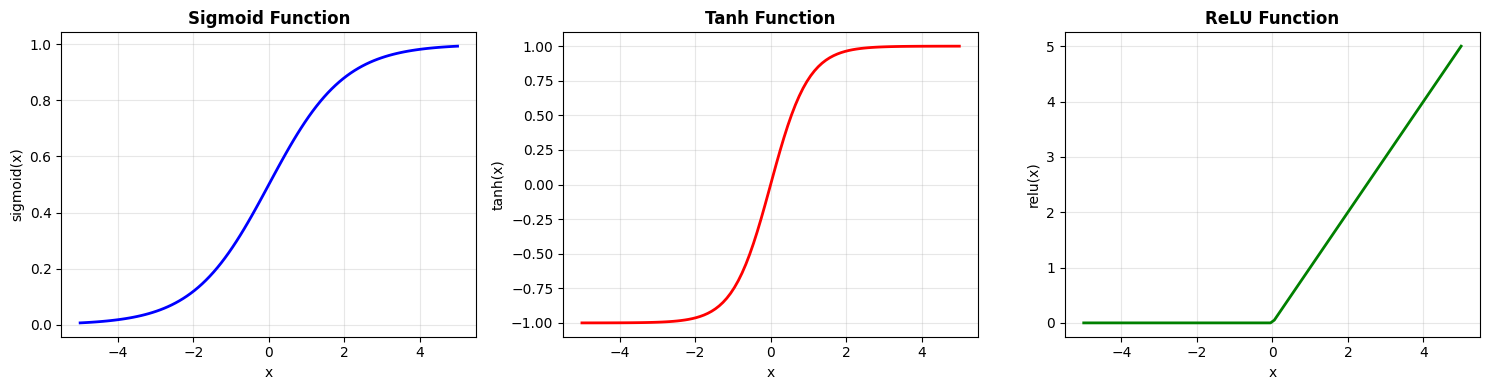

Activation functions defined successfully!


In [4]:
class ActivationFunctions:
    """Collection of activation functions and their derivatives"""

    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

    @staticmethod
    def sigmoid_derivative(x):
        """Derivative of sigmoid function"""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)

    @staticmethod
    def tanh(x):
        """Tanh activation function"""
        return np.tanh(x)

    @staticmethod
    def tanh_derivative(x):
        """Derivative of tanh function"""
        return 1 - np.tanh(x) ** 2

    @staticmethod
    def relu(x):
        """ReLU activation function"""
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        """Derivative of ReLU function"""
        return (x > 0).astype(float)

x_test = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(x_test, ActivationFunctions.sigmoid(x_test), 'b-', linewidth=2)
plt.title('Sigmoid Function', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

plt.subplot(1, 3, 2)
plt.plot(x_test, ActivationFunctions.tanh(x_test), 'r-', linewidth=2)
plt.title('Tanh Function', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('tanh(x)')

plt.subplot(1, 3, 3)
plt.plot(x_test, ActivationFunctions.relu(x_test), 'g-', linewidth=2)
plt.title('ReLU Function', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('relu(x)')

plt.tight_layout()
plt.show()

print("Activation functions defined successfully!")

#Single-Layer Perceptron (For Linearly Separable Data)

In [5]:
class Perceptron:
    """Single-layer Perceptron for binary classification"""

    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.randn(input_size, 1) * 0.01
        self.bias = np.zeros((1, 1))
        self.learning_rate = learning_rate
        self.losses = []

    def forward(self, X):
        """Forward propagation"""
        z = np.dot(X, self.weights) + self.bias
        a = ActivationFunctions.sigmoid(z)
        return a

    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        m = y_true.shape[0]
        epsilon = 1e-15  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def backward(self, X, y_true, y_pred):
        """Backward propagation"""
        m = X.shape[0]

        dz = y_pred - y_true
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def train(self, X, y, epochs=1000, verbose=True):
        """Train the perceptron"""
        y = y.reshape(-1, 1)

        for epoch in range(epochs):
            y_pred = self.forward(X)

            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            self.backward(X, y, y_pred)

            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                accuracy = self.accuracy(X, y)
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

    def accuracy(self, X, y):
        y = y.reshape(-1, 1)
        predictions = self.predict(X)
        return np.mean(predictions == y)

print("Perceptron class defined successfully")

Perceptron class defined successfully


# Multi-Layer Neural Network (For Non-Linearly Separable Data)

In [6]:
class NeuralNetwork:

    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):

        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.learning_rate = learning_rate
        self.losses = []

        if activation == 'sigmoid':
            self.activation = ActivationFunctions.sigmoid
            self.activation_derivative = ActivationFunctions.sigmoid_derivative
        elif activation == 'tanh':
            self.activation = ActivationFunctions.tanh
            self.activation_derivative = ActivationFunctions.tanh_derivative
        elif activation == 'relu':
            self.activation = ActivationFunctions.relu
            self.activation_derivative = ActivationFunctions.relu_derivative

        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            if activation == 'relu':
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            else:
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(1.0 / layer_sizes[i])

            b = np.zeros((1, layer_sizes[i+1]))

            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):

        self.z_values = []
        self.activations = [X]

        A = X

        for i in range(self.num_layers - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            self.z_values.append(Z)

            if i == self.num_layers - 2:
                A = ActivationFunctions.sigmoid(Z)
            else:
                A = self.activation(Z)

            self.activations.append(A)

        return A

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def backward(self, y_true):
        m = y_true.shape[0]
        y_true = y_true.reshape(-1, 1)

        dW = [None] * (self.num_layers - 1)
        db = [None] * (self.num_layers - 1)

        dZ = self.activations[-1] - y_true

        for i in reversed(range(self.num_layers - 1)):
            dW[i] = (1/m) * np.dot(self.activations[i].T, dZ)
            db[i] = (1/m) * np.sum(dZ, axis=0, keepdims=True)

            if i > 0:
                dA = np.dot(dZ, self.weights[i].T)
                dZ = dA * self.activation_derivative(self.z_values[i-1])

        for i in range(self.num_layers - 1):
            self.weights[i] -= self.learning_rate * dW[i]
            self.biases[i] -= self.learning_rate * db[i]

    def train(self, X, y, epochs=1000, verbose=True):
        for epoch in range(epochs):
            y_pred = self.forward(X)

            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            self.losses.append(loss)

            self.backward(y)

            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                accuracy = self.accuracy(X, y)
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions.flatten() == y)

print("Neural Network class defined successfully")

Neural Network class defined successfully


#Train Perceptron on Linearly Separable Data

In [7]:
# Split the data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

# Standardize the data
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

# Create and train perceptron
print("Training Single-Layer Perceptron on Linearly Separable Data")
print("=" * 60)
perceptron = Perceptron(input_size=2, learning_rate=0.1)
perceptron.train(X_train_linear_scaled, y_train_linear, epochs=500)

# Test accuracy
train_acc = perceptron.accuracy(X_train_linear_scaled, y_train_linear)
test_acc = perceptron.accuracy(X_test_linear_scaled, y_test_linear)
print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Training Single-Layer Perceptron on Linearly Separable Data
Epoch 0/500 - Loss: 0.6910 - Accuracy: 0.9688
Epoch 100/500 - Loss: 0.2147 - Accuracy: 0.9812
Epoch 200/500 - Loss: 0.1569 - Accuracy: 0.9812
Epoch 300/500 - Loss: 0.1341 - Accuracy: 0.9812
Epoch 400/500 - Loss: 0.1218 - Accuracy: 0.9812
Epoch 499/500 - Loss: 0.1141 - Accuracy: 0.9812

Final Train Accuracy: 0.9812
Final Test Accuracy: 0.9750


### Visualize Perceptron Results

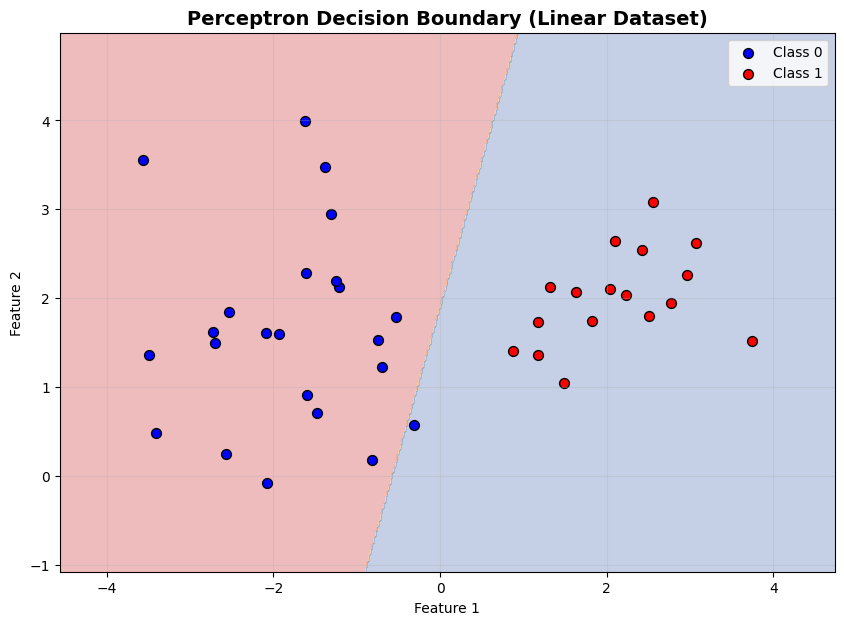

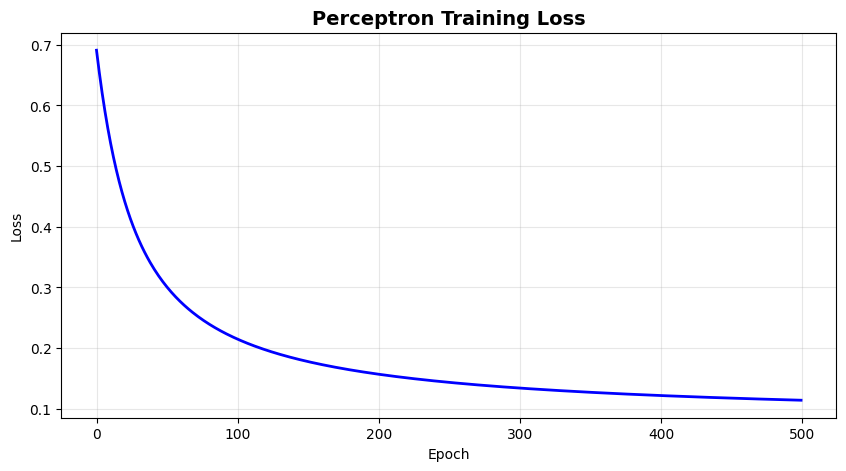

In [8]:
def plot_decision_boundary(model, X, y, title, scaler=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if scaler is not None:
        mesh_data = scaler.transform(mesh_data)

    Z = model.predict(mesh_data)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue',
                label='Class 0', edgecolors='k', s=50)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red',
                label='Class 1', edgecolors='k', s=50)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary(perceptron, X_test_linear, y_test_linear,
                       'Perceptron Decision Boundary (Linear Dataset)',
                       scaler_linear)

plt.figure(figsize=(10, 5))
plt.plot(perceptron.losses, 'b-', linewidth=2)
plt.title('Perceptron Training Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Train Neural Network on Non-Linearly Separable Data (Circles)

In [9]:
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X_circles, y_circles, test_size=0.2, random_state=42
)

scaler_circles = StandardScaler()
X_train_circles_scaled = scaler_circles.fit_transform(X_train_circles)
X_test_circles_scaled = scaler_circles.transform(X_test_circles)

print("Training Multi-Layer Neural Network on Circles Dataset")
print("=" * 60)
print("Architecture: [2, 8, 4, 1] (Input=2, Hidden1=8, Hidden2=4, Output=1)")
print("Activation: ReLU\n")

nn_circles = NeuralNetwork(
    layer_sizes=[2, 8, 4, 1],
    activation='relu',
    learning_rate=0.1
)

nn_circles.train(X_train_circles_scaled, y_train_circles, epochs=2000)
train_acc = nn_circles.accuracy(X_train_circles_scaled, y_train_circles)
test_acc = nn_circles.accuracy(X_test_circles_scaled, y_test_circles)
print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Training Multi-Layer Neural Network on Circles Dataset
Architecture: [2, 8, 4, 1] (Input=2, Hidden1=8, Hidden2=4, Output=1)
Activation: ReLU

Epoch 0/2000 - Loss: 0.6688 - Accuracy: 0.5125
Epoch 100/2000 - Loss: 0.5833 - Accuracy: 0.6937
Epoch 200/2000 - Loss: 0.4474 - Accuracy: 0.8562
Epoch 300/2000 - Loss: 0.2681 - Accuracy: 0.9812
Epoch 400/2000 - Loss: 0.1446 - Accuracy: 0.9938
Epoch 500/2000 - Loss: 0.0860 - Accuracy: 0.9938
Epoch 600/2000 - Loss: 0.0600 - Accuracy: 0.9938
Epoch 700/2000 - Loss: 0.0460 - Accuracy: 0.9938
Epoch 800/2000 - Loss: 0.0372 - Accuracy: 0.9938
Epoch 900/2000 - Loss: 0.0314 - Accuracy: 0.9938
Epoch 1000/2000 - Loss: 0.0273 - Accuracy: 1.0000
Epoch 1100/2000 - Loss: 0.0242 - Accuracy: 1.0000
Epoch 1200/2000 - Loss: 0.0219 - Accuracy: 1.0000
Epoch 1300/2000 - Loss: 0.0200 - Accuracy: 1.0000
Epoch 1400/2000 - Loss: 0.0186 - Accuracy: 1.0000
Epoch 1500/2000 - Loss: 0.0173 - Accuracy: 1.0000
Epoch 1600/2000 - Loss: 0.0163 - Accuracy: 1.0000
Epoch 1700/2000 - Lo

### Visualize Neural Network Results (Circles)

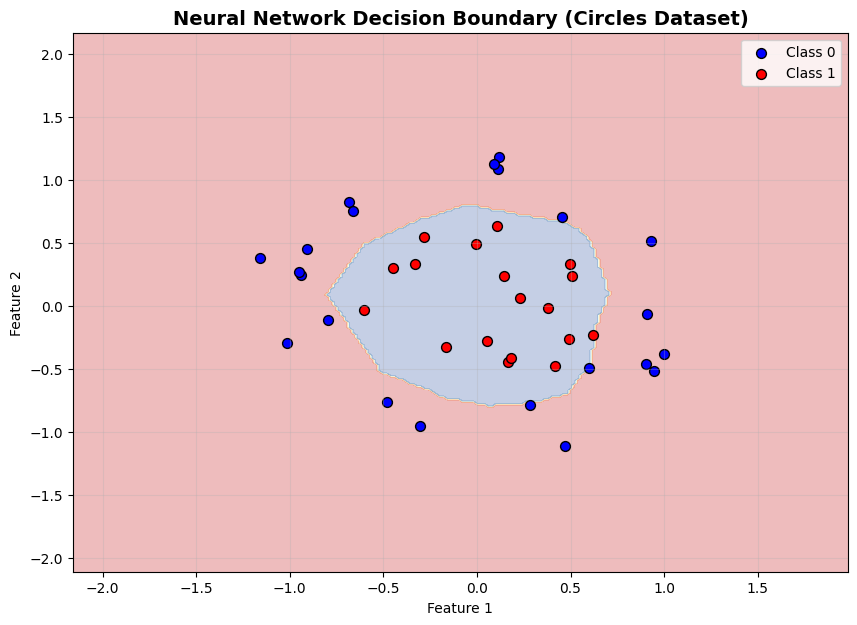

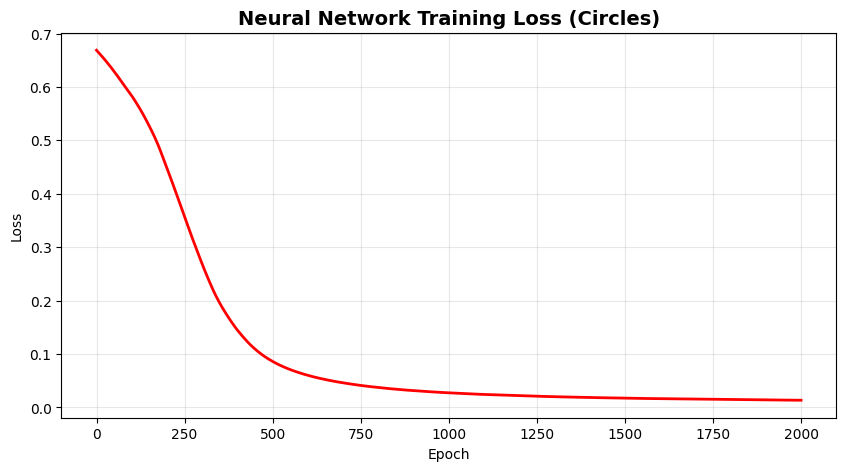

In [10]:
# Plot decision boundary
plot_decision_boundary(nn_circles, X_test_circles, y_test_circles,
                       'Neural Network Decision Boundary (Circles Dataset)',
                       scaler_circles)

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(nn_circles.losses, 'r-', linewidth=2)
plt.title('Neural Network Training Loss (Circles)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

 Train Neural Network on Non-Linearly Separable Data (Moons)

In [11]:
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

print("Training Multi-Layer Neural Network on Moons Dataset")
print("=" * 60)
print("Architecture: [2, 6, 4, 1] (Input=2, Hidden1=6, Hidden2=4, Output=1)")
print("Activation: Tanh\n")

nn_moons = NeuralNetwork(
    layer_sizes=[2, 6, 4, 1],
    activation='tanh',
    learning_rate=0.1
)

nn_moons.train(X_train_moons_scaled, y_train_moons, epochs=2000)
train_acc = nn_moons.accuracy(X_train_moons_scaled, y_train_moons)
test_acc = nn_moons.accuracy(X_test_moons_scaled, y_test_moons)
print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Training Multi-Layer Neural Network on Moons Dataset
Architecture: [2, 6, 4, 1] (Input=2, Hidden1=6, Hidden2=4, Output=1)
Activation: Tanh

Epoch 0/2000 - Loss: 0.7115 - Accuracy: 0.4125
Epoch 100/2000 - Loss: 0.3264 - Accuracy: 0.8500
Epoch 200/2000 - Loss: 0.3021 - Accuracy: 0.8625
Epoch 300/2000 - Loss: 0.2858 - Accuracy: 0.8875
Epoch 400/2000 - Loss: 0.2639 - Accuracy: 0.9062
Epoch 500/2000 - Loss: 0.2256 - Accuracy: 0.9313
Epoch 600/2000 - Loss: 0.1658 - Accuracy: 0.9500
Epoch 700/2000 - Loss: 0.1077 - Accuracy: 0.9688
Epoch 800/2000 - Loss: 0.0709 - Accuracy: 0.9875
Epoch 900/2000 - Loss: 0.0502 - Accuracy: 1.0000
Epoch 1000/2000 - Loss: 0.0380 - Accuracy: 1.0000
Epoch 1100/2000 - Loss: 0.0301 - Accuracy: 1.0000
Epoch 1200/2000 - Loss: 0.0247 - Accuracy: 1.0000
Epoch 1300/2000 - Loss: 0.0208 - Accuracy: 1.0000
Epoch 1400/2000 - Loss: 0.0179 - Accuracy: 1.0000
Epoch 1500/2000 - Loss: 0.0156 - Accuracy: 1.0000
Epoch 1600/2000 - Loss: 0.0138 - Accuracy: 1.0000
Epoch 1700/2000 - Loss

### Visualize Neural Network Results (Moons)

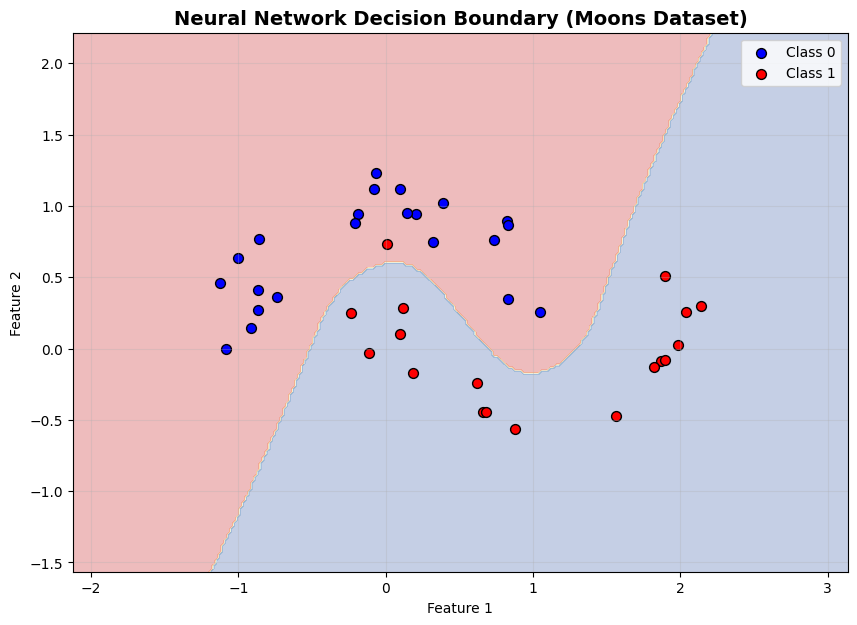

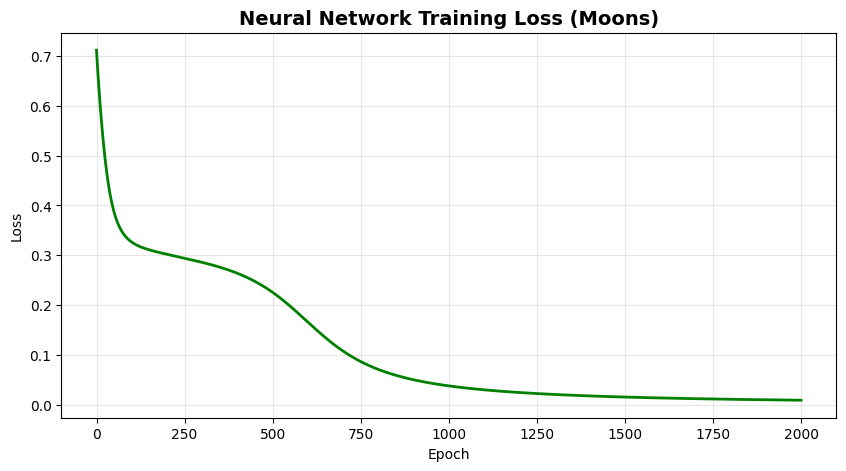

In [12]:
# Plot decision boundary
plot_decision_boundary(nn_moons, X_test_moons, y_test_moons,
                       'Neural Network Decision Boundary (Moons Dataset)',
                       scaler_moons)

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(nn_moons.losses, 'g-', linewidth=2)
plt.title('Neural Network Training Loss (Moons)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Demonstrate Why Perceptron Fails on Non-Linear Data

In [13]:
print("Training Single-Layer Perceptron on Non-Linear Data (Circles)")
print("=" * 60)
print("This demonstrates why a perceptron fails on non-linearly separable data\n")

perceptron_circles = Perceptron(input_size=2, learning_rate=0.1)
perceptron_circles.train(X_train_circles_scaled, y_train_circles, epochs=1000)

train_acc = perceptron_circles.accuracy(X_train_circles_scaled, y_train_circles)
test_acc = perceptron_circles.accuracy(X_test_circles_scaled, y_test_circles)
print(f"\nPerceptron Train Accuracy: {train_acc:.4f}")
print(f"Perceptron Test Accuracy: {test_acc:.4f}")
print("\nNotice the low accuracy! Perceptron cannot learn non-linear boundaries.")

Training Single-Layer Perceptron on Non-Linear Data (Circles)
This demonstrates why a perceptron fails on non-linearly separable data

Epoch 0/1000 - Loss: 0.6932 - Accuracy: 0.5188
Epoch 100/1000 - Loss: 0.6921 - Accuracy: 0.5875
Epoch 200/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 300/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 400/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 500/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 600/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 700/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 800/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 900/1000 - Loss: 0.6921 - Accuracy: 0.5938
Epoch 999/1000 - Loss: 0.6921 - Accuracy: 0.5938

Perceptron Train Accuracy: 0.5938
Perceptron Test Accuracy: 0.5250

Notice the low accuracy! Perceptron cannot learn non-linear boundaries.


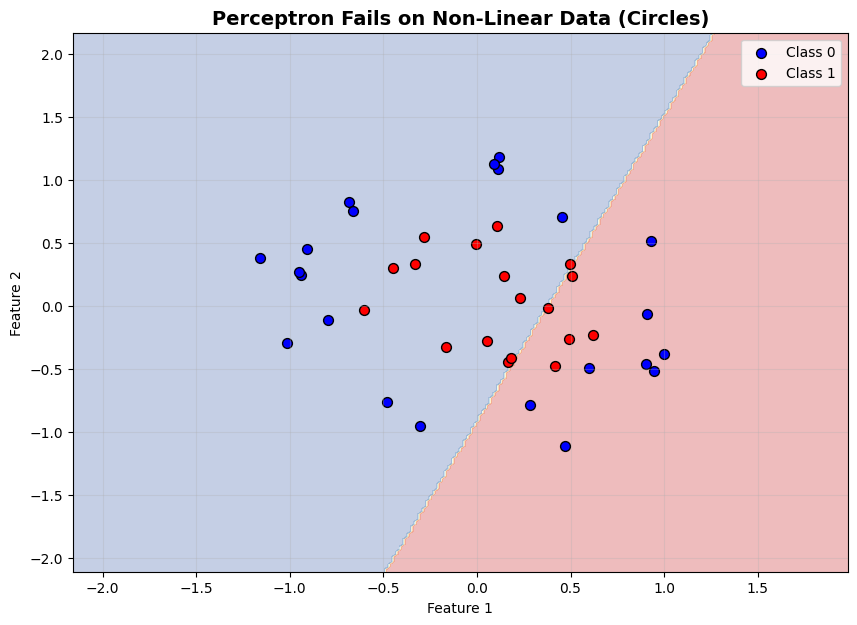

In [14]:
# Plot perceptron's attempt at non-linear data
plot_decision_boundary(perceptron_circles, X_test_circles, y_test_circles,
                       'Perceptron Fails on Non-Linear Data (Circles)',
                       scaler_circles)

# Comparison and Results Summary

In [15]:
print("="*30)
print("EXPERIMENT RESULTS SUMMARY")
print("="*30)

print("\n1. LINEARLY SEPARABLE DATA (make_classification)")
print("-" * 30)
print(f"   Single-Layer Perceptron Accuracy: {perceptron.accuracy(X_test_linear_scaled, y_test_linear):.4f}")
print("   Perceptron successfully learns linear decision boundary")

print("\n2. NON-LINEARLY SEPARABLE DATA - CIRCLES")
print("-" * 30)
print(f"   Single-Layer Perceptron Accuracy: {perceptron_circles.accuracy(X_test_circles_scaled, y_test_circles):.4f}")
print("   Perceptron FAILS on non-linear data")
print(f"\n   Multi-Layer Neural Network Accuracy: {nn_circles.accuracy(X_test_circles_scaled, y_test_circles):.4f}")
print("    Neural Network successfully learns complex boundary")

print("\n3. NON-LINEARLY SEPARABLE DATA - MOONS")
print("-" * 30)
print(f"   Multi-Layer Neural Network Accuracy: {nn_moons.accuracy(X_test_moons_scaled, y_test_moons):.4f}")
print("   Neural Network successfully learns complex boundary")

print("\n" + "="*30)
print("KEY LEARNINGS:")
print("="*30)
print("""
1. Single-layer perceptron works well ONLY for linearly separable data
2. For non-linear problems, we need:
   - Multiple hidden layers
   - Non-linear activation functions (ReLU, Tanh, Sigmoid)
3. Hidden layers allow the network to learn complex feature representations
4. Different activation functions can be more effective for different problems
""")
print("="*30)

EXPERIMENT RESULTS SUMMARY

1. LINEARLY SEPARABLE DATA (make_classification)
------------------------------
   Single-Layer Perceptron Accuracy: 0.9750
   Perceptron successfully learns linear decision boundary

2. NON-LINEARLY SEPARABLE DATA - CIRCLES
------------------------------
   Single-Layer Perceptron Accuracy: 0.5250
   Perceptron FAILS on non-linear data

   Multi-Layer Neural Network Accuracy: 1.0000
    Neural Network successfully learns complex boundary

3. NON-LINEARLY SEPARABLE DATA - MOONS
------------------------------
   Multi-Layer Neural Network Accuracy: 0.9750
   Neural Network successfully learns complex boundary

KEY LEARNINGS:

1. Single-layer perceptron works well ONLY for linearly separable data
2. For non-linear problems, we need:
   - Multiple hidden layers
   - Non-linear activation functions (ReLU, Tanh, Sigmoid)
3. Hidden layers allow the network to learn complex feature representations
4. Different activation functions can be more effective for differen

# Compare Different Activation Functions

Testing Different Activation Functions on Circles Dataset

Training with SIGMOID activation...
SIGMOID Test Accuracy: 0.5500

Training with TANH activation...
TANH Test Accuracy: 0.9750

Training with RELU activation...
RELU Test Accuracy: 1.0000


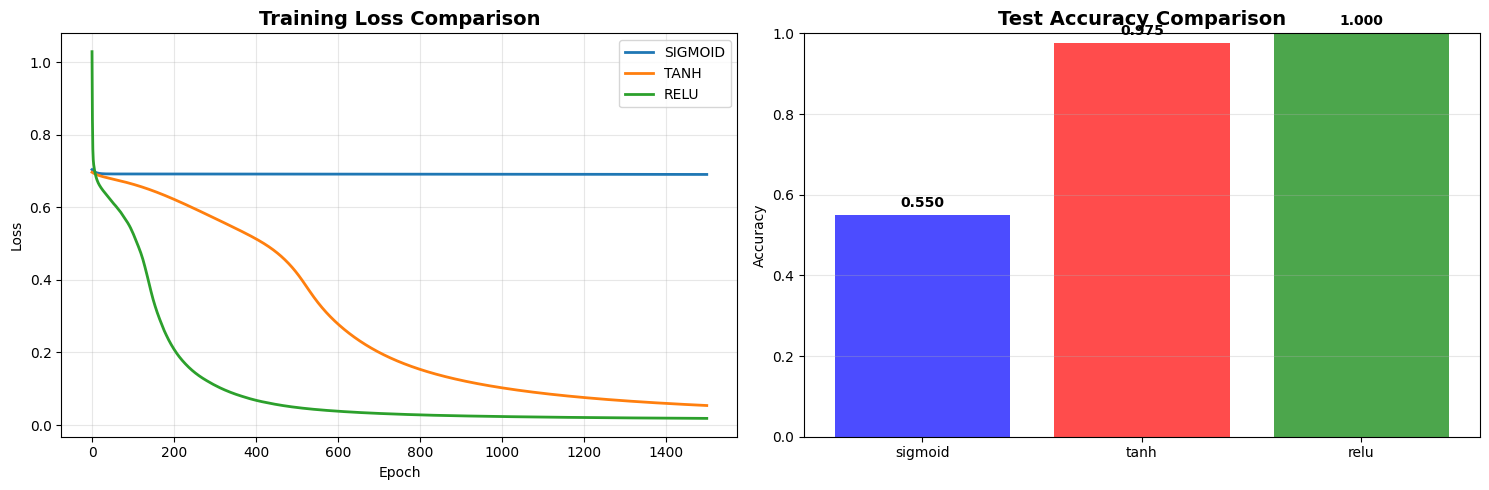

In [16]:
print("Testing Different Activation Functions on Circles Dataset")
print("=" * 60)

activations = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activations:
    print(f"\nTraining with {activation.upper()} activation...")
    nn_test = NeuralNetwork(
        layer_sizes=[2, 8, 4, 1],
        activation=activation,
        learning_rate=0.1
    )
    nn_test.train(X_train_circles_scaled, y_train_circles, epochs=1500, verbose=False)

    test_acc = nn_test.accuracy(X_test_circles_scaled, y_test_circles)
    results[activation] = {
        'accuracy': test_acc,
        'losses': nn_test.losses
    }
    print(f"{activation.upper()} Test Accuracy: {test_acc:.4f}")

# Plot comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for activation in activations:
    plt.plot(results[activation]['losses'], label=activation.upper(), linewidth=2)
plt.title('Training Loss Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
accuracies = [results[act]['accuracy'] for act in activations]
plt.bar(activations, accuracies, color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()